In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import math

<h1>Read dataset</h1>

In [3]:
#read the dataset
data = pd.read_csv("./diabetes.csv")
#display some rows
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


<h1>Plot data distribution</h1>

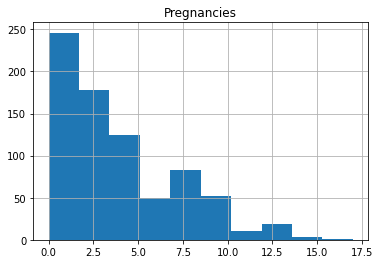

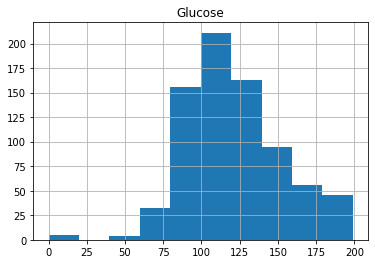

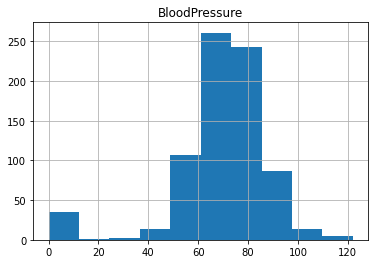

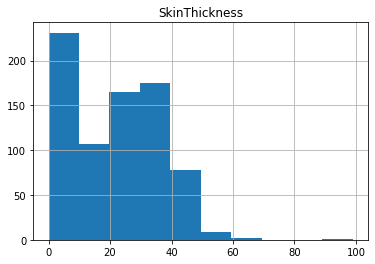

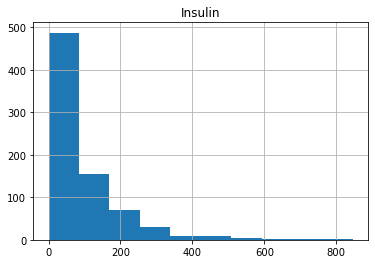

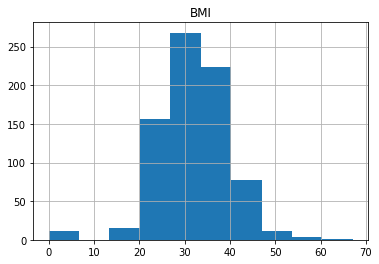

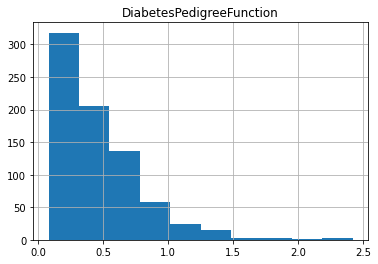

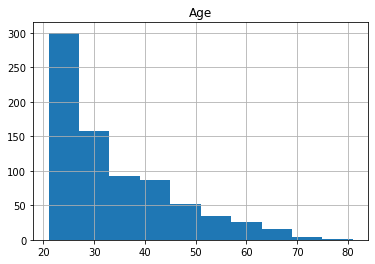

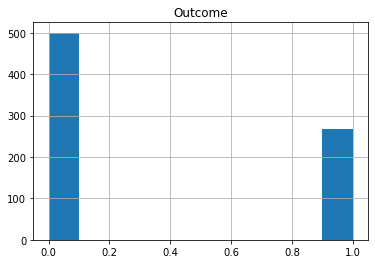

In [4]:
for col in data.columns: 
    try:      
        data[col] = pd.to_numeric(data[col]) 
        data.hist(column=col)
    except ValueError:
        print('This column can not be represented as a histogram')

<h1>Store outcomes and features</h1>

In [7]:
y = data.Outcome.values
x_data = data.drop(['Outcome'], axis=1)

x_data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


<h1>Normalization: scale all features between 0 and 1 so they can be directly comparable</h1>

In [8]:
# %% normalization
x = (x_data -np.min(x_data))/(np.max(x_data)-np.min(x_data)).values

x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,0.483333
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000
...,...,...,...,...,...,...,...,...
763,0.588235,0.507538,0.622951,0.484848,0.212766,0.490313,0.039710,0.700000
764,0.117647,0.613065,0.573770,0.272727,0.000000,0.548435,0.111870,0.100000
765,0.294118,0.608040,0.590164,0.232323,0.132388,0.390462,0.071307,0.150000
766,0.058824,0.633166,0.491803,0.000000,0.000000,0.448584,0.115713,0.433333


<h1>Plot data distribution again</h1>

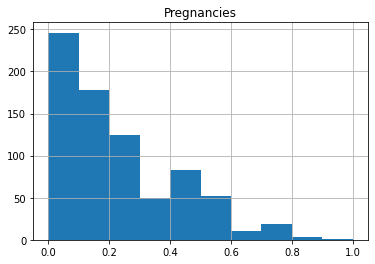

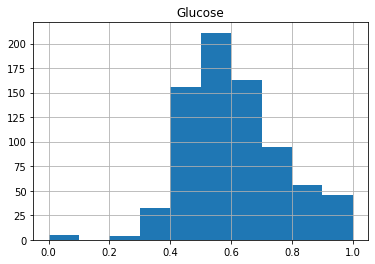

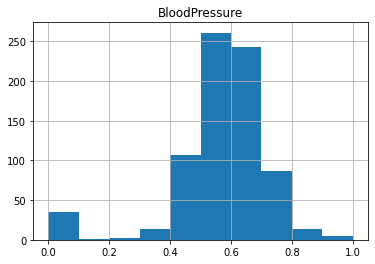

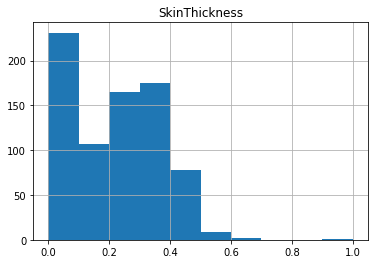

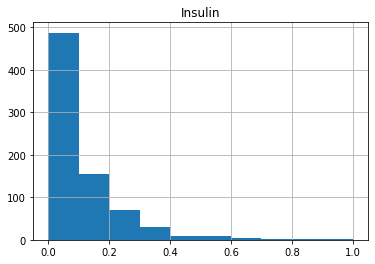

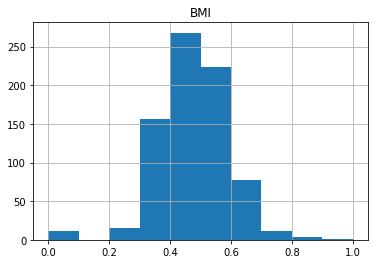

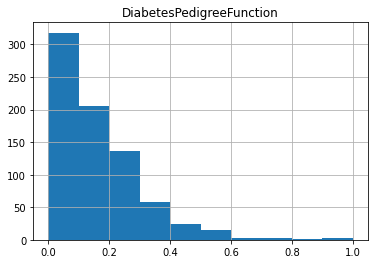

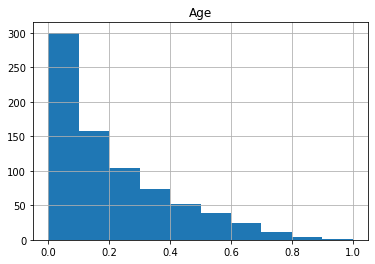

In [29]:
for col in x.columns: 
    try:      
        x[col] = pd.to_numeric(x[col]) 
        x.hist(column=col)
    except ValueError:
        print('This column can not be represented as a histogram')

<h1>Split data in training and test: 70-30</h1>

In [30]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)


<h1>Training the KNN model </h1>

In [34]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=int(math.sqrt(len(x_train))))
classifier.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=23)

<h1>Running the prediction task</h1>

The final step is to make predictions on our test data. To do so, execute the following script:

In [35]:
y_pred = classifier.predict(x_test)

<h1>Evaluating the model</h1>

In [36]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[133  18]
 [ 43  37]]
              precision    recall  f1-score   support

           0       0.76      0.88      0.81       151
           1       0.67      0.46      0.55        80

    accuracy                           0.74       231
   macro avg       0.71      0.67      0.68       231
weighted avg       0.73      0.74      0.72       231

